In [1]:
import json
import pandas as pd
import numpy as np
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
from pylab import rcParams
from lib import *

import seaborn as sns
rcParams['figure.figsize'] = (15.0, 10.0)
import itertools

from haversine import haversine
import time

cm = plt.cm.get_cmap('jet')

from sklearn.cluster import MiniBatchKMeans

# import plotly
# import plotly.plotly as py

# import plotly.graph_objs as go


# plotly.offline.init_notebook_mode() # run at the start of every notebook

In [6]:
df = import_submission("sub_124845")

trips = np.unique(df[np.logical_or(df.Longitude.between(-13,-9.5),df.Longitude.between(-9.5,-6))].TripId)
df_test = df[df.TripId.isin(trips)]
df_test = df_test[~df_test.isin([1062,594,1060,1061,665,636,596,635,637,1056,1055,660,656,657,658,659,655])]
df_test.dropna(inplace=True)


trips = np.unique(df_test.TripId)
trips = trips[np.logical_not(np.isnan(trips))]

df2 = import_submission("sub_124845")

df2 = combo_optimizer(df2,trips)

df2 = combo_optimizer(df2,trips)

df2 = combo_optimizer(df2,trips)

12.4845625061
0.178526651886 ====================================
638.0 639.0 0.0169873443379 ++++++++++++++ 0.0
sort worked 0.00841203951082
sort worked 0.00841202242323
sort worked 0.00841092196129
sort worked 0.00841086342433
sort worked 0.00856408153954
0.0169873443379 0.016981307139 6.03719888626e-06
sort worked 0.0084114695185
sort worked 0.00841118542966
0.016981307139 0.01697477054 6.53659899976e-06
sort worked 0.00840072555908
0.01697477054 0.0169739518001 8.18739867906e-07
0.0169739518001 0.0169735624799 3.89320207059e-07
wrote change to df 0.178512870027
638.0 640.0 0.0164306601201 ++++++++++++++ 0.16
sort worked 0.0078548674519
sort worked 0.00784981588268
sort worked 0.00784415512829
638.0 641.0 0.0169320269891 ++++++++++++++ 0.19
sort worked 0.00835462059264
sort worked 0.00834716704986
sort worked 0.0083459543753
sort worked 0.00833400259207
sort worked 0.00833097873648
sort worked 0.00833041533672
sort worked 0.00832431790726
sort worked 0.00832356806955
638.0 642.0 0.0

In [5]:
trips

array([  638.,   639.,   640.,   641.,   642.,   643.,   644.,   645.,
         646.,   647.,   648.,   649.,   650.,   651.,   652.,   653.,
         654.,  1057.,  1058.,  1059.])

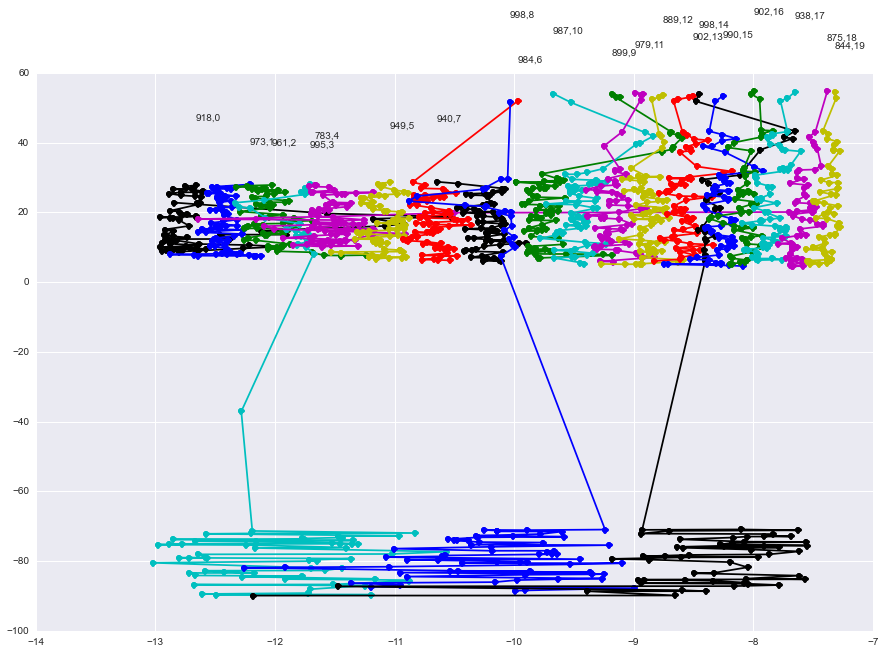

In [220]:

gifts = pd.read_csv("gifts.csv")
df = df2.merge(gifts[["GiftId","Latitude","Longitude"]],on="GiftId")
plot_trips(df,range(2000))

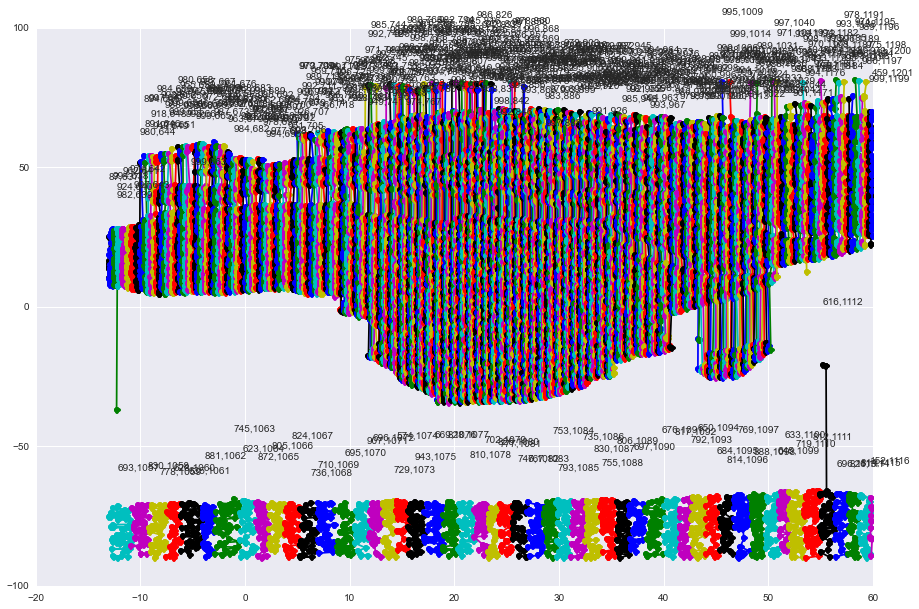

In [178]:
df = import_submission("sub_124845")
plot_trips(df[df.Longitude.between(-13,60)],range(3000))

In [ ]:
[[]
    [-155,-134,10]]

13.0 567.642976446 32.357023554 600


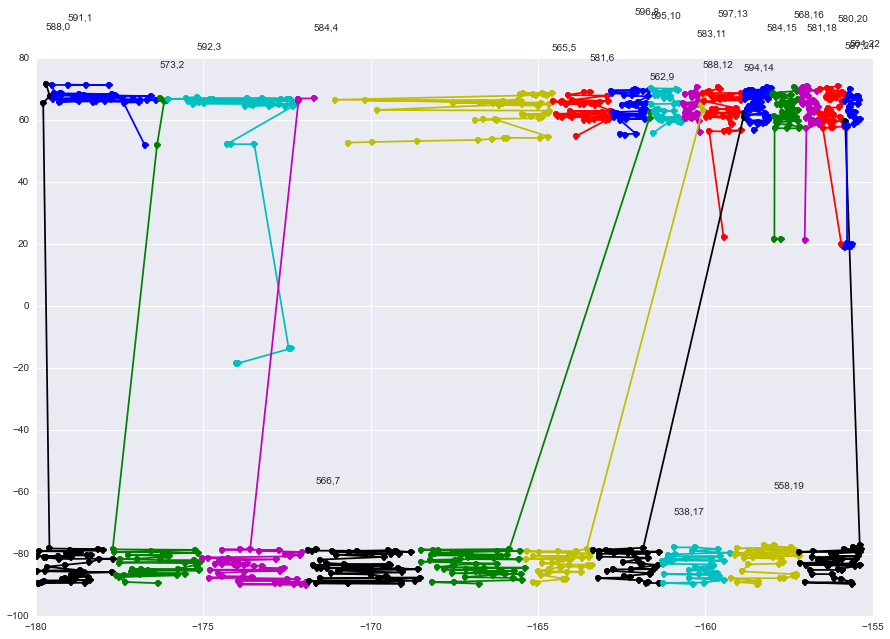

10 0.13972648294
12.0 516.039069496 83.9609305036 600


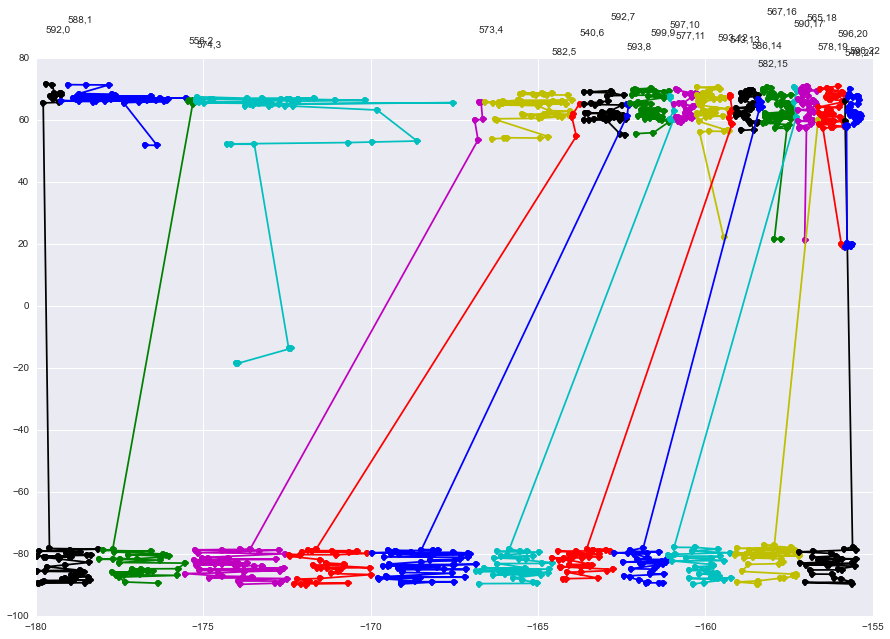

11 0.138564565421
11.0 473.035813705 126.964186295 600


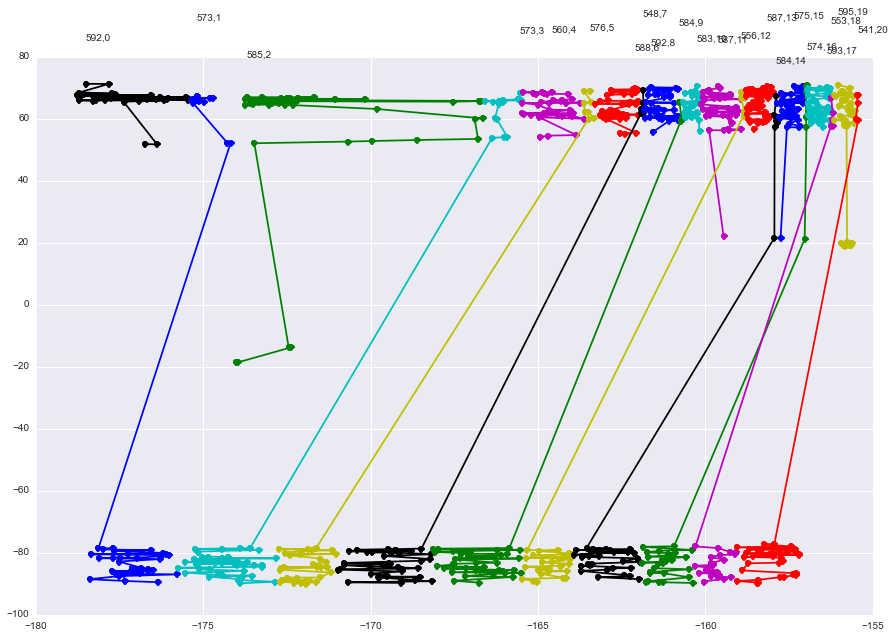

12 0.128078968171


[nan,
 nan,
 nan,
 nan,
 nan,
 0.13972648293984591,
 0.13856456542107612,
 0.12807896817118239]

In [175]:
df = import_submission("sub_124845")
lon_low = -14
lon_high = 10

lon_low = -180
lon_high = -155


# lon_low = 40
# lon_high = 50
lon_diff = lon_high-lon_low
df_test = df[df.Longitude.between(lon_low,lon_high)]
# trips = np.unique(df[df.Longitude.between(-13,60)].TripId)
# df_test = df[df.TripId.isin(trips)]
# df_test = df_test[~df_test.isin([1062,594,1060,1061,665,636,596,635,637,1056,1055,660,656,657,658,659,655])]
# df_test.dropna(inplace=True)


# trips = np.unique(df_test.TripId)
# trips = trips[np.logical_not(np.isnan(trips))]

df_test["TripId"] = np.nan
df_test_h = df_test[df_test.Latitude>-57]
df_test_l = df_test[df_test.Latitude<-57]
plot_trips(df_test_l,range(3000))

tu = df_test_h.Weight.sum()
tl = df_test_l.Weight.sum()
tu,tl

y_ran = np.arange(lon_diff*.5,lon_diff*1.1).astype(int)
out = []
y_ran=[10]
y_ran = range(5,13)
for y in y_ran:
#     y = 12

    target_chunk_weight = 600
    
    ylw_per_chunk = tl/y
    yuw_per_chunk = target_chunk_weight-ylw_per_chunk

    x = np.ceil((tu-yuw_per_chunk*y)/target_chunk_weight)
    xw_per_chunk = target_chunk_weight #(tu-yuw_per_chunk*y)/x
    sp = x/y

    low_trips = np.round(np.linspace(sp/2,(x+y)-sp/2,y))-1

    ylw_per_chunk = ylw_per_chunk
    
    
    if ylw_per_chunk>target_chunk_weight:
        out.append(np.nan)
        continue


    gifts_xyz = df_test_h.sort_values("Longitude")
    gifts_xyz["TripId"]  = optimize(gifts_xyz.Weight.values,xw_per_chunk)
    gifts_xyz2 = df_test_l.sort_values("Longitude")
    gifts_xyz2["TripId"]  = optimize(gifts_xyz2.Weight.values,ylw_per_chunk)
    gifts_xyz3 = gifts_xyz2.sort_values("Longitude")
    gifts_xyz3["TripId"][gifts_xyz3.TripId.isin(np.unique(gifts_xyz3.TripId.values)[y:])] = np.nan
    for i,k in enumerate(low_trips):
        gifts_xyz["TripId"][gifts_xyz.TripId>=k]  = optimize(gifts_xyz[gifts_xyz.TripId>=k].Weight.values, yuw_per_chunk)+k
        gifts_xyz["TripId"][gifts_xyz.TripId>=k+1]  = optimize(gifts_xyz[gifts_xyz.TripId>=k+1].Weight.values, xw_per_chunk)+k+1
        gifts_xyz3["TripId"][gifts_xyz2.TripId==i] = k

    dfs = pd.concat([gifts_xyz3,gifts_xyz]).sort_values(["TripId","Latitude"],ascending=[0,0])
    ww = dfs.groupby("TripId").agg({"Weight":np.sum})
    
    dfs["TripId"][dfs.TripId.isin(ww[ww.Weight<(target_chunk_weight*.85)].index.values)] = np.nan
    dfs.dropna(inplace=True)
    print x,ylw_per_chunk,yuw_per_chunk,xw_per_chunk
    dfs = sort_trips(dfs)
    df = dfs[["GiftId","x","y","z","Weight","TripId"]].merge(gifts[["GiftId","Latitude","Longitude"]],on="GiftId")
    plot_trips(df,range(3000))
    plt.show()
    print y,quick_total_score(dfs)
    out.append(quick_total_score(dfs))
out

In [135]:
ww = dfs.groupby("TripId").agg({"Weight":np.sum})
ww[ww.Weight<(target_chunk_weight*.85)].index.values

array([ 17.])

In [108]:
dfs[["GiftId","TripId"]].to_csv("tight_initialize_10_40_y22.csv",index=None)

In [109]:
ddfs = import_submission("tight_initialize_10_40_y22.csv")
d_lon = ddfs.groupby("TripId").agg({"Longitude":np.mean}).reset_index().sort_values("Longitude")

def chunker(seq, size):
    return (seq[pos:pos + size] for pos in xrange(0, len(seq), size))

num = 15
with open('tight_trip_segments_10_40_{}.txt'.format(num), 'w') as f:
    k = 0
    for g, df_g in d_lon.groupby(np.arange(len(d_lon)) // num):
        f.write(",".join(map(str, list(df_g.TripId.values.astype(int)))))
        f.write("\n")
        print(df_g.TripId.values)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  16.]
[ 14.  15.  17.  18.  19.  20.  21.  22.  28.  23.  24.  25.  26.  27.  29.]
[ 30.  31.  32.  33.  40.  34.  35.  36.  37.  38.  39.  41.  42.  43.  44.]
[ 45.  51.  46.  47.  48.  49.  50.  52.  53.  54.  55.  56.  57.  58.  63.]
[ 59.  60.  61.  62.  64.  65.  66.  67.  68.  69.  70.  71.  75.  72.  73.]
[ 74.  76.  77.  78.  79.  80.  81.  82.  83.  84.  87.  85.  86.  88.  89.]
[  90.   91.   92.   93.   94.   95.   96.   97.   98.   99.  100.  101.
  102.  103.  104.]
[ 105.  106.  107.  108.  109.  111.  110.  112.  113.  114.  115.  116.
  117.  118.  119.]
[ 120.  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.
  132.  134.  133.]
[ 135.  136.  137.  138.  139.  140.  141.  142.  143.  144.  145.  146.
  147.  148.  149.]
[ 150.  151.  152.  153.  154.  155.  156.  158.  159.  160.  161.  157.
  162.  163.  164.]
[ 165.  166.  167.  168.  170.  171.  172.  169.  173.  174.  175.  176.


In [110]:
ddfs.groupby("TripId").agg({"Weight":np.sum}).sort_values("Weight")

Weight
TripId            
261     681.140154
75      924.990386
23      948.236759
44      951.217811
103     952.080358
255     955.852545
252     956.018660
129     956.212512
74      957.267335
58      958.013482
216     958.663674
238     959.493645
127     959.618131
123     961.697327
154     963.093878
33      963.163525
225     963.499780
134     963.555705
69      963.849713
99      964.065885
60      964.351651
19      964.484668
140     964.812105
116     965.053883
43      965.266036
247     966.191100
96      966.215627
160     967.350055
90      967.372713
242     967.529663
...            ...
8       994.354132
93      994.371508
5       994.378073
185     994.491144
118     994.646698
260     994.722653
186     995.178824
231     995.217504
71      995.259425
113     995.455663
257     995.476420
67      995.499973
0       995.664350
212     995.664431
125     995.681154
24      995.692463
1       995.751737
92      995.836200
131     995.927319
233     995.929713
163     995.931004
34      996.020715
49      996.026994
21      996.045864
18      996.202045
249     996.206848
243     996.206984
215     996.216963
156     996.224813
181     998.819472

[262 rows x 1 columns]

In [113]:
gap = 40
breaks = range(-180+gap,180,gap)
breaks

[-140, -100, -60, -20, 20, 60, 100, 140]

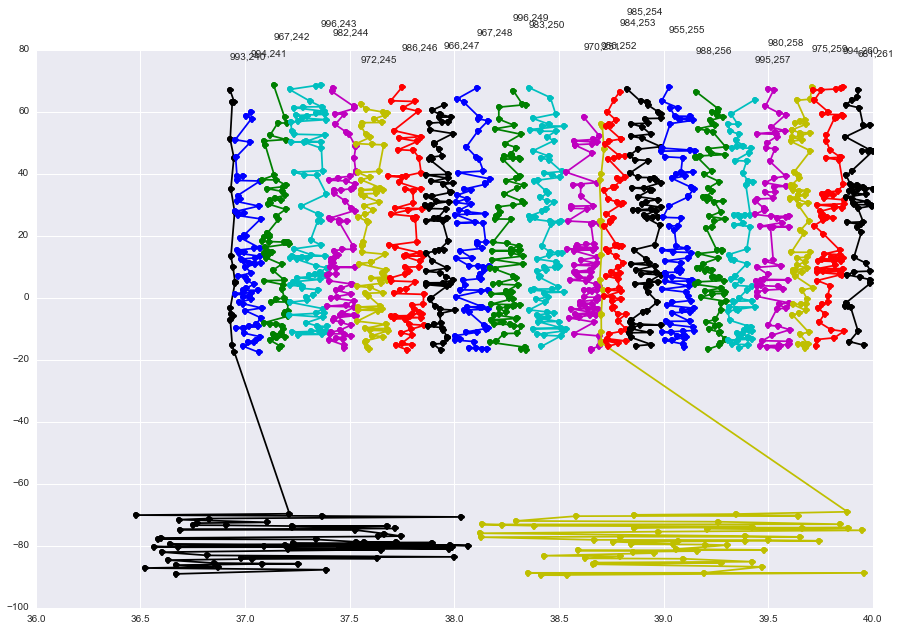

In [111]:
plot_trips(ddfs[ddfs.TripId.isin(range(240,300))],range(300))

In [23]:
df_out = combo_optimizer(ddfs,range(236,242))
df_out.groupby("TripId").agg({"Weight":np.sum})

2.4232084287
0.05543129604 ====================================
236 237 0.015339835845 ++++++++++++++ 0.0
0.015339835845 0.015337004865 2.83097997793e-06
0.015337004865 0.0153369516586 5.32064614173e-08
0.0153369516586 0.0153364482979 5.03360614579e-07
wrote change to df 0.055427908028
237 238 0.015100374386 ++++++++++++++ 0.11
0.015100374386 0.0150973509397 3.02344634191e-06
0.0150973509397 0.0150962674475 1.08349223722e-06
0.0150962674475 0.0150959880797 2.79367789756e-07
wrote change to df 0.0554235216853
238 239 0.0236548405444 ++++++++++++++ 0.24
0.0236548405444 0.0236536397914 1.20075303832e-06
0.0236536397914 0.0236535369158 1.02875616897e-07
wrote change to df 0.0554222180692
239 240 0.0245585655347 ++++++++++++++ 0.37
0.0245585655347 0.0245581492386 4.162961037e-07
0.0245581492386 0.0245573725115 7.76727083002e-07
wrote change to df 0.0554210250591
240 241 0.0163218428057 ++++++++++++++ 0.48
0.0163218428057 0.0163213148709 5.27934733097e-07
0.0163213148709 0.0163173812366 3.93

Weight
TripId            
236     989.598618
237     991.519297
238     986.946370
239     999.875793
240     996.393036
241     995.727821

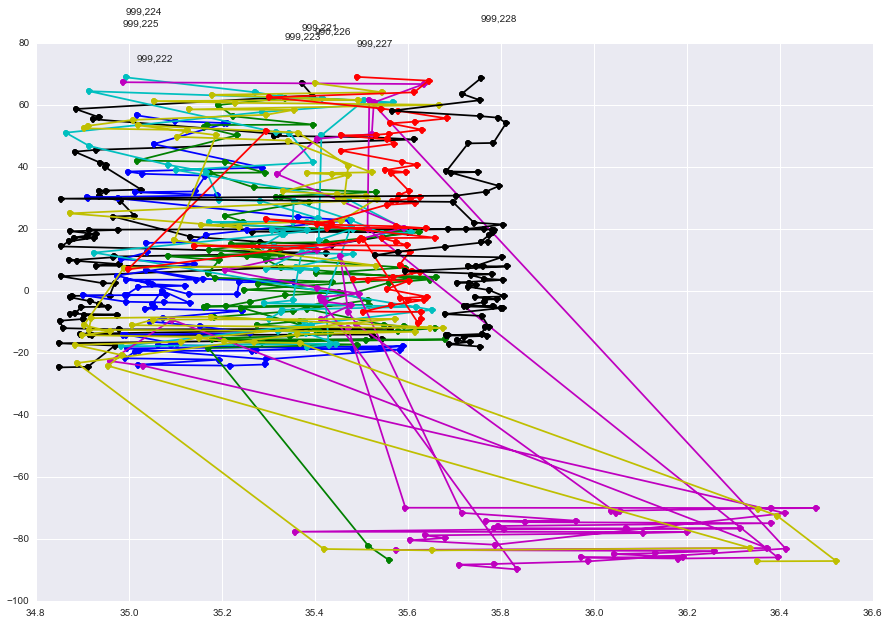

In [5]:

gifts = pd.read_csv("gifts.csv")
df_out = df_out[["TripId","GiftId","x","y","z","Weight"]].merge(gifts[["GiftId","Latitude","Longitude"]],on="GiftId")
plot_trips(df_out,range(300))

In [8]:
sorted(list(itertools.combinations(range(8),2)),key = lambda k: abs(k[1]-k[0]))

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (0, 2),
 (1, 3),
 (2, 4),
 (3, 5),
 (4, 6),
 (5, 7),
 (0, 3),
 (1, 4),
 (2, 5),
 (3, 6),
 (4, 7),
 (0, 4),
 (1, 5),
 (2, 6),
 (3, 7),
 (0, 5),
 (1, 6),
 (2, 7),
 (0, 6),
 (1, 7),
 (0, 7)]

In [328]:
def sort_trips(df2,trips=None):
    if trips is None:
        trips = np.unique(df2.TripId)

    for tr in trips:
        t0 = df2[df2.TripId.isin([tr])][["GiftId","x","y","z","Weight"]].values
        t0 = bb_sort(t0)
        df2 = df2[~df2.TripId.isin([tr])]
        new_trips = pd.DataFrame(t0,columns=["GiftId","x","y","z","Weight"])
        new_trips["TripId"] = np.array([tr]*len(t0)).astype(int)
        df2 = pd.concat([df2[["GiftId","x","y","z","Weight","TripId"]],new_trips])
#         print "wrote change to df", quick_total_score(df2)
    return df2

dfs = sort_trips(dfs)

sort worked 0.0083027228515
sort worked 0.00830162238955
sort worked 0.00830156385259
sort worked 0.00829041562825
sort worked 0.00828790358753
sort worked 0.00828193690042
sort worked 0.00811157864016
sort worked 0.00810799843441
sort worked 0.00810176132023
sort worked 0.0080974091717
sort worked 0.00844323985292
sort worked 0.00843557920856
sort worked 0.00843432616675
sort worked 0.00842190387235
sort worked 0.00842004671931
sort worked 0.00841686978135
sort worked 0.00841661459241
sort worked 0.00830104924094
sort worked 0.00829253637451
sort worked 0.00829126878287
sort worked 0.00828357526222
sort worked 0.00828260753692
sort worked 0.00828143778119
sort worked 0.0082800727241
sort worked 0.00812159621058
sort worked 0.00812115394761
sort worked 0.00801706198714
sort worked 0.00801666114181
sort worked 0.0079209649777
sort worked 0.00792049910538
sort worked 0.00792032383584
sort worked 0.00792022777286
sort worked 0.00770314064555
sort worked 0.00773755267543
sort worked 0.0077

In [329]:

gifts = pd.read_csv("gifts.csv")
df = dfs[["GiftId","x","y","z","Weight","TripId"]].merge(gifts[["GiftId","Latitude","Longitude"]],on="GiftId")
plot_trips(df,range(3000))
quick_total_score(df)

0.89166039481632142

0.17860987598404615

In [123]:
import copy
trips = np.unique(dfs.TripId)
# trips = trips[np.logical_not(np.isnan(trips))]
# df2 = import_submission("sub_124845")
df2 = copy.copy(dfs)

df2 = combo_optimizer(df2,trips)

df2 = combo_optimizer(df2,trips)

df2 = combo_optimizer(df2,trips)

0.178377389623
0.178377389623 ====================================
0.0 1.0 0.0158526273196 ++++++++++++++ 0.0
sort worked 0.00787558632103
sort worked 0.00787483413365
sort worked 0.00796580406503
sort worked 0.00796578004201
0.0158526273196 0.0158463122377 6.31508191366e-06
sort worked 0.00789782364703
sort worked 0.00789747053083
0.0158463122377 0.0158402379816 6.07425610377e-06
0.0158402379816 0.0158353772395 4.86074205025e-06
sort worked 0.00762084804798
sort worked 0.00762059999056
0.0158353772395 0.0158345365592 8.40680292841e-07
0.0158345365592 0.0158326650772 1.87148209593e-06
wrote change to df 0.178357427349
0.0 2.0 0.0154944265926 ++++++++++++++ 0.23
sort worked 0.00774491226234
sort worked 0.00774168376719
sort worked 0.00773615119589
sort worked 0.00773509968779
0.0154944265926 0.0154922681296 2.15846305479e-06
sort worked 0.00774715991581
sort worked 0.00774714271493
0.0154922681296 0.0154823436156 9.92451401473e-06
0.0154823436156 0.0154822588869 8.4728619381e-08
0.01548

In [124]:

gifts = pd.read_csv("gifts.csv")
df = df2.merge(gifts[["GiftId","Latitude","Longitude"]],on="GiftId")
plot_trips(df,range(2000))

20
3


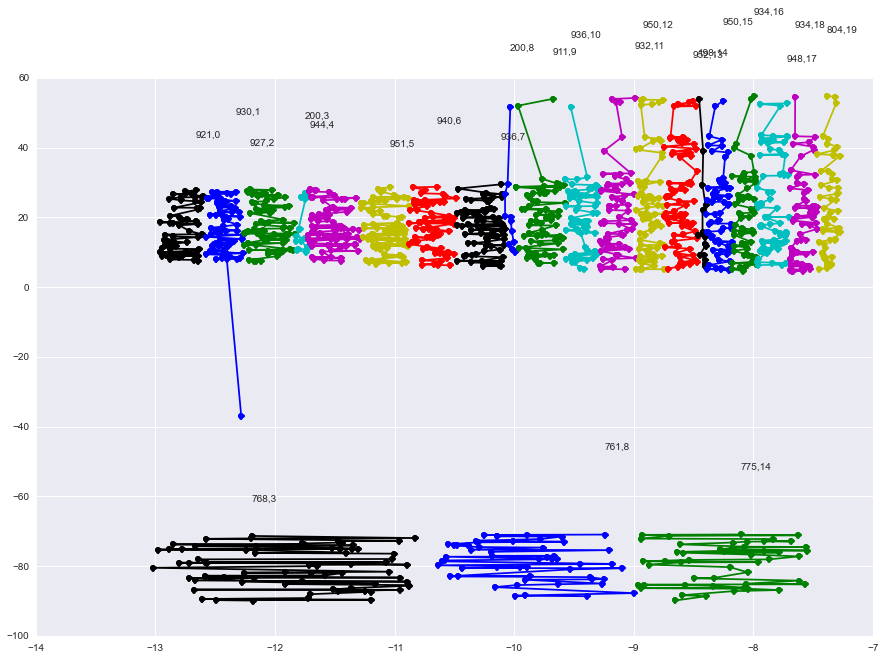

20


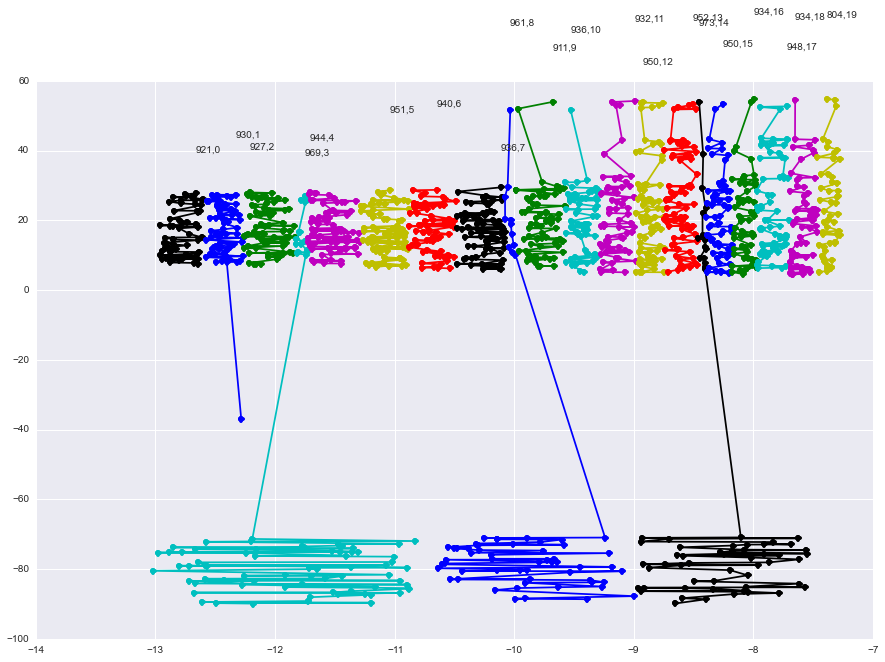

In [112]:
plot_trips(gifts_xyz.sort_values(["TripId","Latitude"],ascending=[0,0]),range(30))
print len(np.unique(gifts_xyz.TripId))
plot_trips(gifts_xyz2.sort_values(["TripId","Latitude"],ascending=[0,0]),range(30))
print len(np.unique(gifts_xyz2.TripId))
plt.show()
plot_trips(dfs,range(30))
print len(np.unique(dfs.TripId))

In [113]:
quick_total_score(dfs)

0.17837738962328575

20 18588.9327393 18713.318287 0.176464267635


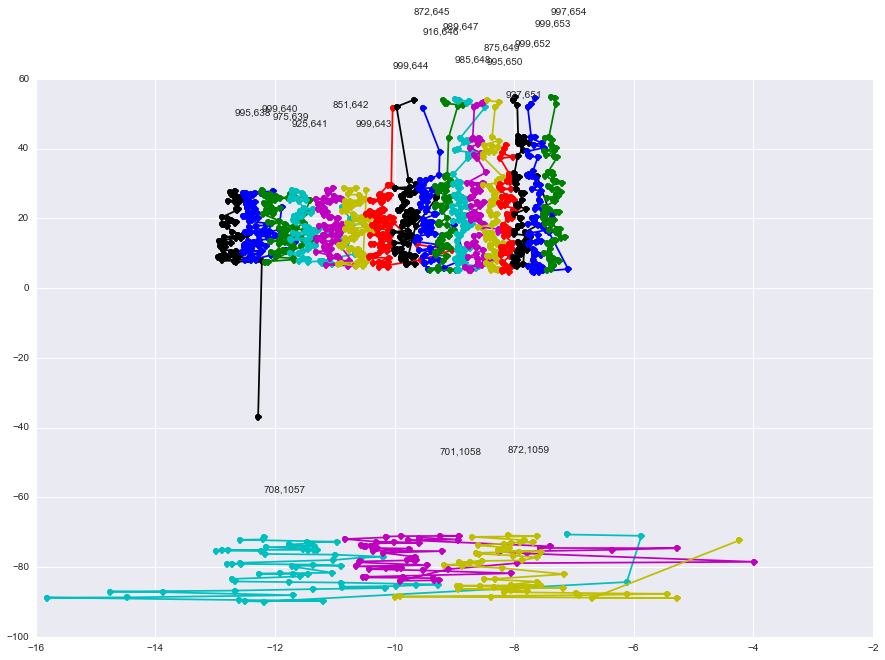

In [119]:
df = import_submission("submission_v17.csv")

trips = np.unique(df[np.logical_or(df.Longitude.between(-13,-9.5),df.Longitude.between(-9.5,-6))].TripId)
df_test = df[df.TripId.isin(trips)]
df_test = df_test[~df_test.isin([1062,594,1060,1061,665,636,596,635,637,1056,1055,660,656,657,658,659,655])]
df_test.dropna(inplace=True)


trips = np.unique(df_test.TripId)
trips = trips[np.logical_not(np.isnan(trips))]

plot_trips(df_test,range(3000))
print len(np.unique(df_test.TripId)),df_test.Weight.sum(),dfs.Weight.sum(),quick_total_score(df_test)